<a href="https://colab.research.google.com/github/arubianos/MetNumUN2023I/blob/main/Lab2/arubiano_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
!pip install -U fortran-magic
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [2]:
assert ran_the_first_cell, "Oh noes!"

In [3]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [4]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [5]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [6]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [7]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [8]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [9]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [10]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [11]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [12]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [13]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [14]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [15]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [16]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [17]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [18]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [19]:
%%time

matmul(a, b)

CPU times: user 63 µs, sys: 0 ns, total: 63 µs
Wall time: 78.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [20]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [21]:
a = [[1, 3, 5],
     [2, 4, 6],
     [8, 9, 10],
     [1, 1, 1]]

b = [[1, 3, 5, 7],
     [9, 2, 4, 6]]

In [23]:
def matmul1(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [24]:
def matmul2(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
          try:
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
          except IndexError:
            print('Error: Probar otros valores en la matriz')
            return
    return out

In [25]:
%%time
matmul2(a, b)
#Claramente da un error, porque se estaría operando la matriz con valores que no existen en B

Error: Probar otros valores en la matriz
CPU times: user 547 µs, sys: 863 µs, total: 1.41 ms
Wall time: 1.51 ms


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [26]:
def matmul3(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) == len(B): 
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]
      
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [27]:
def matmul4(A, B):
    """Multiply matrix A by matrix B."""

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    if len(A[0])==len(B):
     for i in range(rows_out):
          for j in range(cols_out):
              #for k in range(len(B)):
              for k in range(len(A[0])):
                    out[i][j] += A[i][k] * B[k][j]
    else:
      print('Error, la matriz no puede ser operada debido a que sus dimensiones no lo permiten, causa:', 'len(A[0])!=len(B)')
    return out

In [28]:
%%time
matmul4(a, b)

Error, la matriz no puede ser operada debido a que sus dimensiones no lo permiten, causa: len(A[0])!=len(B)
CPU times: user 429 µs, sys: 0 ns, total: 429 µs
Wall time: 318 µs


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [29]:
A = [[22, 44, 66, 88], [110, 132, 154, 176], [196, 220, 242, 164]]

B = [[164, 242, 220], [196, 176, 154], [132, 110, 88], [66, 44, 22]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [30]:
%%time
matmul4(A, B)

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 48.2 µs


[[26752, 24200, 19360], [75856, 74536, 61952], [118032, 119988, 101904]]

In [31]:
%%time
print('El producto del ejemplo 6 es:', matmul4(A, B))

El producto del ejemplo 6 es: [[26752, 24200, 19360], [75856, 74536, 61952], [118032, 119988, 101904]]
CPU times: user 1.24 ms, sys: 0 ns, total: 1.24 ms
Wall time: 1.21 ms


In [32]:
import random

In [33]:
random.normalvariate(0,1)

0.19222972083550338

In [34]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.36118949239874865, 0.2001562410589932, 0.20510860974972323],
 [0.7650891177901443, 0.2983688123601975, 0.7264766618754156]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [35]:
import time as tm
def mt_multi_time(matA, matB, rep):
  tm_sum = 0

  for i in range(rep):
    st = tm.process_time()

    response = matmul4(matA, matB)

    end = tm.process_time()

    tm_passed = end - st
    tm_sum += tm_passed

    print('Ejecucion {0} = {1} segundos'.format(i+1, tm_passed))

  avr = tm_sum/rep
  print(' Promedio:',avr, 'segundos')
  return avr

randmA = random_matrix(600, 100)
randmB = random_matrix(100, 600)

avr_py = mt_multi_time(randmA, randmB, 10)

Ejecucion 1 = 7.846653172999999 segundos
Ejecucion 2 = 7.092258295999999 segundos
Ejecucion 3 = 7.728701740999998 segundos
Ejecucion 4 = 7.817360300999997 segundos
Ejecucion 5 = 7.043668031000003 segundos
Ejecucion 6 = 7.756288740999999 segundos
Ejecucion 7 = 7.679714582999999 segundos
Ejecucion 8 = 7.018656934000006 segundos
Ejecucion 9 = 7.527272240000002 segundos
Ejecucion 10 = 7.579839974999999 segundos
 Promedio: 7.509041401499999 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [36]:
print('El tiempo de cálculo que tiene python para una sola iteración de matmul, es de', avr_py,'segundos. El tiempo que se demoró en entregar los resultados fue de', avr_py*10, 'segundos.')

El tiempo de cálculo que tiene python para una sola iteración de matmul, es de 7.509041401499999 segundos. El tiempo que se demoró en entregar los resultados fue de 75.090414015 segundos.


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [37]:
import time

In [38]:
%%time

import numpy as np

for i in range(10):
  M1 = np.array([randmA])
  M2 = np.array([randmB])
  print(np.dot(M1, M2))

  media = 0
for i in range(10):
  start_time = time.time()
  np.dot(randmA,randmB)
  v = time.time() - start_time
  media= media+v

media=media/10

[[[[25.14258998 25.0109176  23.99457434 ... 26.3644256  25.13911851
    24.69487724]]

  [[22.45545406 20.64786761 22.41145379 ... 22.45931264 23.0822496
    21.81664769]]

  [[23.86616053 21.16926933 22.04301885 ... 24.84206596 23.02399329
    22.54854559]]

  ...

  [[22.20563676 22.6586049  22.11213677 ... 23.68092861 21.44670232
    21.96242758]]

  [[24.19807569 24.81807837 24.94236095 ... 27.65142483 25.5542856
    26.13161806]]

  [[20.63869578 21.91039157 22.10188068 ... 23.79758281 22.05252247
    22.93983348]]]]
[[[[25.14258998 25.0109176  23.99457434 ... 26.3644256  25.13911851
    24.69487724]]

  [[22.45545406 20.64786761 22.41145379 ... 22.45931264 23.0822496
    21.81664769]]

  [[23.86616053 21.16926933 22.04301885 ... 24.84206596 23.02399329
    22.54854559]]

  ...

  [[22.20563676 22.6586049  22.11213677 ... 23.68092861 21.44670232
    21.96242758]]

  [[24.19807569 24.81807837 24.94236095 ... 27.65142483 25.5542856
    26.13161806]]

  [[20.63869578 21.91039157 22.1

In [39]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 7.86 s, sys: 28.7 ms, total: 7.88 s
Wall time: 8.3 s


In [40]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [41]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [42]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [43]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 40.7 ms, sys: 0 ns, total: 40.7 ms
Wall time: 40.8 ms


333328333350000.0

In [44]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 125 µs, sys: 0 ns, total: 125 µs
Wall time: 129 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [45]:
A = [[22, 44], [66, 88]]

B = [[88, 44], [66, 22]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [46]:
%%fortran
subroutine fortran_matmul(matA, matB, R)
    real, intent(in) :: matA(2,2)
    real, intent(in) :: matB(2,2)
    real, intent(out) :: R(2,2)

    ! Compatible matrix -> # A's columns = # B's rows
  
    do i=1,2
      do j=1,2
        do k=1,2
          R(i,j) = R(i,j) + matA(i,k) * matB(k,j)
        end do
      end do
    end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [47]:
npA = np.array(A)
npB = np.array(B)

In [48]:
%%time
fortran_matmul(npA, npB)

CPU times: user 174 µs, sys: 904 µs, total: 1.08 ms
Wall time: 1.16 ms


array([[ 4840.,  1936.],
       [11616.,  4840.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [49]:
%%fortran
subroutine matmul_fortran_600x100(matA, matB, R)
    real, intent(in) :: matA(600,100)
    real, intent(in) :: matB(100,600)
    real, intent(out) :: R(600,600)
  
    do i=1,600
      do j=1,600
        do k=1,100
          R(i,j) = R(i,j) + matA(i,k) * matB(k,j)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [50]:
RMA1 = random_matrix(600, 100) #Matriz random A
RMB1 = random_matrix(100, 600) #Matriz random 

npRMA1 = np.array(RMA1)
npRMB1 = np.array(RMB1)

matmul_fortran_600x100(npRMA1,npRMB1)

array([[26.400938, 23.624073, 26.69016 , ..., 25.577293, 28.131758,
        24.316881],
       [22.778286, 22.597519, 24.309877, ..., 22.272932, 25.378075,
        21.89951 ],
       [23.877663, 23.352661, 26.557009, ..., 24.016085, 26.65912 ,
        23.133158],
       ...,
       [23.770779, 23.474129, 26.563057, ..., 23.127167, 28.73501 ,
        23.864578],
       [24.83912 , 23.474802, 27.119022, ..., 23.915247, 28.664474,
        24.352655],
       [25.084867, 24.48804 , 26.80982 , ..., 21.595434, 29.468445,
        23.691822]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [51]:
import pandas as pd
import numpy as np

Lenguajes = ["Python", "NumPy","Fortranmagic","Fortran","c","C++","Java","Javascript"]
TABLA = pd.DataFrame({"Lenguajes": Lenguajes, "Promedio(s)": [0.0]*len(Lenguajes), "Factor de velocidad": [0.0]*len(Lenguajes)})

import time

t = []
for i in range(10):
  start = time.time()
  matmul_fortran_600x100(npRMA1,npRMB1)
  end = time.time()
  t.append(end-start)

np.array(t).mean()
TABLA.at[2, 'Promedio(s)']= np.array(t).mean()*10
TABLA.at[0, 'Promedio(s)']= avr_py
TABLA.at[1, 'Promedio(s)']= media
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Java,0.000000,0.0
7,Javascript,0.000000,0.0


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [52]:
%%writefile FPM10.f
      Programa matrices
        Entero, Real(600, 100) :: MA
        Entero, Real(100, 600) :: MB
        Entero, Real(100, 100) :: MC
        Entero :: i,j

        do i = 1, 600
          do j = 1, 100
              MA(i, j) = i+j
          end do
        end do

        do i = 1, 100
          do j = 1, 600
              MB(i, j) = i*j
          end do
        end do

        MC = matmul(MB, MA)

	      stop
      end

Writing FPM10.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
%%time
!gfortran FPM10.f -o FPM10
!./FPM10

FPM10.f:2:8:

    2 |         Entero, Real(600, 100) :: MA
      |        1
Error: Unclassifiable statement at (1)
FPM10.f:9:14:

    9 |               MA(i, j) = i+j
      |              1
Error: The function result on the lhs of the assignment at (1) must have the pointer attribute.
FPM10.f:15:14:

   15 |               MB(i, j) = i*j
      |              1
Error: The function result on the lhs of the assignment at (1) must have the pointer attribute.
FPM10.f:19:20:

   19 |         MC = matmul(MB, MA)
      |                    1
Error: ‘matrix_a’ argument of ‘matmul’ intrinsic at (1) must be numeric or LOGICAL
/bin/bash: ./FPM10: No such file or directory
CPU times: user 12.8 ms, sys: 12 ms, total: 24.8 ms
Wall time: 261 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [54]:
TABLA.at[3, 'Promedio(s)']= 261/10000
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.026100,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Java,0.000000,0.0
7,Javascript,0.000000,0.0


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [55]:
%%writefile matmulMC.c

#include <stdlib.h>
#include<time.h>
#include<stdio.h>

int main()
{
    srand(time(0));
    int MA[600][100],MB[100][600],MC[600][600];
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            MA[i][j]=rand()%100;
        }
    }
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            MB[i][j]=rand()%100;
        }
    }


    float ti,tf,retx;
    double time_spent=0.0;
    for(int rep=0;rep<10;rep++){
        ti=clock();
        for(int i=0;i<600;i++){
            for(int j=0;j<600;j++){
                MC[i][j]=0;
                for(int k=0;k<100;k++){
                    MC[i][j]+=MA[i][k]*MB[k][j];
              }
            }
        }
        tf=clock();
      time_spent += (double)(tf - ti) / CLOCKS_PER_SEC;
    }
    printf("%f",time_spent/10);
   return 0;
}

Writing matmulMC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
!gcc matmulMC.c -o matmulMC
!./matmulMC

0.176310

**My own example 21 - Adding c average execution time to the data frame**

In [57]:
TABLA.iat[4, TABLA.columns.get_loc('Promedio(s)')]= 0.176310
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.026100,0.0
4,c,0.176310,0.0
5,C++,0.000000,0.0
6,Java,0.000000,0.0
7,Javascript,0.000000,0.0


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [58]:
%%writefile matmulMC++.cpp
#include <iostream>

using namespace std;
 
using namespace std;
int C1, C2, R1, R2;
 
void mulMat(int mA[][C1],int mB[][C2]) {
    int rslt[R1][C2];
 
    for (int i = 0; i < R1; i++) {
        for (int j = 0; j < C2; j++) {
            rslt[i][j] = 0;
 
            for (int k = 0; k < R2; k++) {
                rslt[i][j] += mA[i][k] * mB[k][j];
            }
 
        }
 
    }
}
 
int main(void) {
    // Square Matrices
    // R1 = 4, C1 = 4 and R2 = 4, C2 = 4 (Update these values in MACROs)
    int mA[R1][C1] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    int mB[R2][C2] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    /*
    // Rectangular Matrices
    // R1 = 3, C1 = 4 and R2 = 4, C2 = 3 (Update these values in MACROs)
    int mA[R1][C1] = {
                {1, 1, 1, 1},
                {2, 2, 2, 2},
                {3, 3, 3, 3}
    };
 
    int mB[R2][C2] = {
                {1, 1, 1},
                {2, 2, 2},
                {3, 3, 3},
                {4, 4, 4}
    };
    */
 
    if (C1 != R2) {
        cout << "The number of columns in Matrix-1  must be equal to the number of rows in "
                "Matrix-2" << endl;
 
        exit(EXIT_FAILURE);
    }
 
    for (int i = 0; i < 10; i++){
      auto start = high_resolution_clock::now();
      mulMat(mA, mB);
      auto stop  = high_resolution_clock::now();
      auto duration = duration_cast<microseconds>(stop - start);
      cout << "Time: "
         << duration.count() << " microseconds" << endl;
    }

 
    return 0;
}

Writing matmulMC++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
!g++ matmulMC++.cpp -o matmulMC++
!./matmulMC++

matmulMC++.cpp:8:24: error: array bound is not an integer constant before ‘]’ token
    8 | void mulMat(int mA[][C1],int mB[][C2]) {
      |                        ^
matmulMC++.cpp:8:25: error: expected ‘)’ before ‘,’ token
    8 | void mulMat(int mA[][C1],int mB[][C2]) {
      |            ~            ^
      |                         )
matmulMC++.cpp:8:26: error: expected unqualified-id before ‘int’
    8 | void mulMat(int mA[][C1],int mB[][C2]) {
      |                          ^~~
matmulMC++.cpp: In function ‘int main()’:
matmulMC++.cpp:66:20: error: ‘high_resolution_clock’ has not been declared
   66 |       auto start = high_resolution_clock::now();
      |                    ^~~~~~~~~~~~~~~~~~~~~
matmulMC++.cpp:68:20: error: ‘high_resolution_clock’ has not been declared
   68 |       auto stop  = high_resolution_clock::now();
      |                    ^~~~~~~~~~~~~~~~~~~~~
matmulMC++.cpp:69:23: error: ‘duration_cast’ was not declared in this scope; did you mean ‘duration’?
  

**My own example 24 - Adding C++ average execution time to the data frame**

In [60]:
TABLA.at[5, "Promedio(s)"] = (np.array([483333 ,180189 ,322057 ,199797 ,200597 ,210312 ,202244 ,201007 ,202998 ,204244 ]).mean())/1000000
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.026100,0.0
4,c,0.176310,0.0
5,C++,0.240678,0.0
6,Java,0.000000,0.0
7,Javascript,0.000000,0.0


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [61]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      System.out.println("Average time in nanoSec: "+((timef - timei)/10));
    }catch(Exception e){
      System.out.println(e);
    }
    
  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [62]:
!javac Main.java
!java Main

Average time in nanoSec: 59653012


**My own example 27 - Adding Java average execution time to the data frame**

In [63]:
TABLA.iat[6, TABLA.columns.get_loc('Promedio(s)')]=(59653012/10**9) 
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.026100,0.0
4,c,0.176310,0.0
5,C++,0.240678,0.0
6,Java,0.059653,0.0
7,Javascript,0.000000,0.0


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [64]:
%%writefile Mult10.js
const { performance } = require('perf_hooks');

function generateWeights(rows, cols) {
  return Array.from({ length: rows }).map(() =>
    Array.from({ length: cols }).map(() => Math.random() * 2)
  );
}

function multiply(a, b) {
  var aNumRows = a.length, aNumCols = a[0].length,
      bNumRows = b.length, bNumCols = b[0].length,
      m = new Array(aNumRows);  // initialize array of rows
  for (var r = 0; r < aNumRows; ++r) {
    m[r] = new Array(bNumCols); // initialize the current row
    for (var c = 0; c < bNumCols; ++c) {
      m[r][c] = 0;             // initialize the current cell
      for (var i = 0; i < aNumCols; ++i) {
        m[r][c] += a[r][i] * b[i][c];
      }
    }
  }
  return m;
}

for (var i = 0; i < 10; i++){
  var start = performance.now();
  var a = generateWeights(600, 100);
  var b = generateWeights(100, 600);
  multiply(a, b);
  var end = performance.now();
  var time = end- start;
  console.log(time + " ms");
}

Writing Mult10.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [65]:
avrJ= !node Mult10.js
avrJ

['231.02741600002628 ms',
 '181.11361300002318 ms',
 '197.34125400008634 ms',
 '204.33604399999604 ms',
 '187.07401300000492 ms',
 '191.9910229999805 ms',
 '204.92876400006935 ms',
 '196.65662400005385 ms',
 '203.48235399997793 ms',
 '195.2618230000371 ms']

**My own example 30 - Adding Javascript average execution time to the data frame**

In [66]:
TABLA.at[7, "Promedio(s)"] = (231.02741600002628 +
 181.11361300002318 +
 197.34125400008634 +
 204.33604399999604 +
 187.07401300000492 +
 191.9910229999805 +
 204.92876400006935 +
 196.65662400005385 +
 203.48235399997793 +
 195.2618230000371)/10**4
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,0.0
1,NumPy,0.028279,0.0
2,Fortranmagic,0.288016,0.0
3,Fortran,0.026100,0.0
4,c,0.176310,0.0
5,C++,0.240678,0.0
6,Java,0.059653,0.0
7,Javascript,0.199321,0.0


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [67]:
FactorV=min(TABLA["Promedio(s)"])
FactorV

0.0261

**My own example 32 - Adding the Speed factor columne to the data frame**

In [68]:
TABLA["Factor de velocidad"]=TABLA["Promedio(s)"]/FactorV

**My own example 33 - Sorting the the data frame by average execution time**

In [69]:
TABLA.sort_values(by=['Promedio(s)'])
TABLA

,Lenguajes,Promedio(s),Factor de velocidad
0,Python,7.509041,287.702736
1,NumPy,0.028279,1.083474
2,Fortranmagic,0.288016,11.035108
3,Fortran,0.026100,1.000000
4,c,0.176310,6.755172
5,C++,0.240678,9.221372
6,Java,0.059653,2.285556
7,Javascript,0.199321,7.636831


## Why is the Python Version so Much Slower?

In [70]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [71]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [72]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [73]:
data + data

array([2, 4, 6, 8])

In [74]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 1.62 ms


333328333350000.0

In [75]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.1 ms, sys: 2.93 ms, total: 5.02 ms
Wall time: 5.26 ms


333328333350000.0

In [76]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 185 µs, sys: 0 ns, total: 185 µs
Wall time: 216 µs


333328333350000.0

In [77]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [79]:
# We also can't grow an array once it's created.
#data.append(3)

In [80]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [81]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [82]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [83]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [84]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [85]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [86]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [87]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [88]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [89]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [90]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [91]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [92]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [93]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [94]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [95]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [96]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [97]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [98]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [99]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [100]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [101]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [102]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [103]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [104]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [105]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [106]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [107]:
variance(np.random.standard_normal(1000))

0.9774973091030644

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [108]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [109]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [110]:
data.mean()

14.5

In [111]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [112]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [113]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [114]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [115]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [116]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [117]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [118]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [119]:
# ... or by label.
s.loc['a']

1

In [120]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [121]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [122]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [123]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [124]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [125]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [126]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
url = 'https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv'
aapl = pd.read_csv(url, parse_dates=['Date'], index_col='Date') #aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

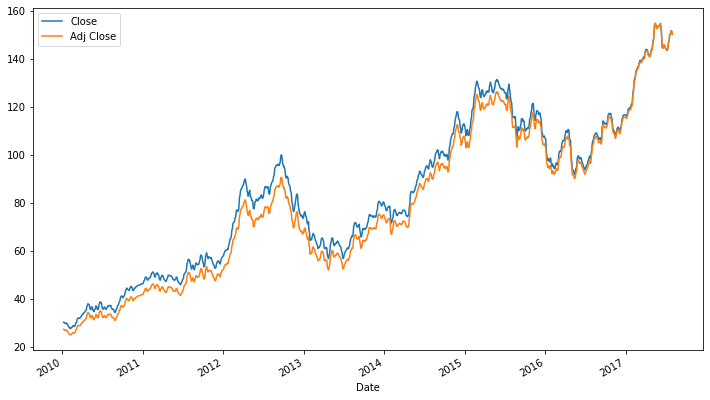

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

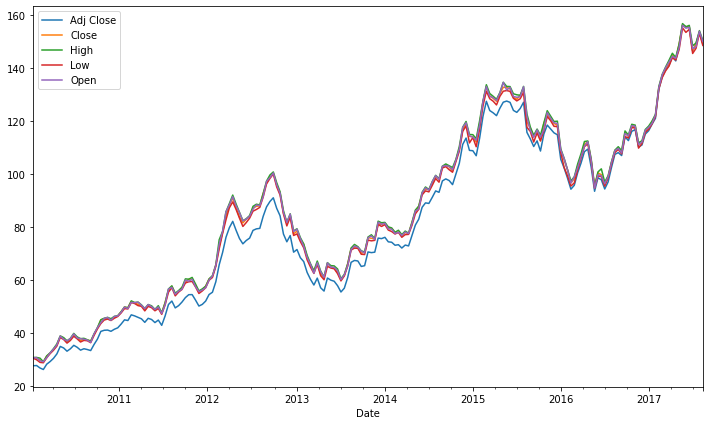

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

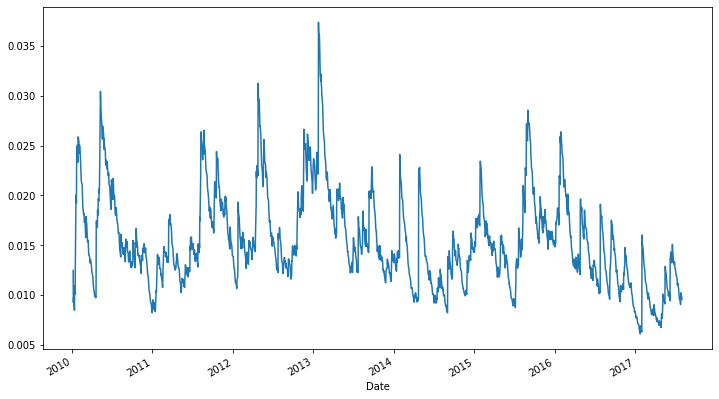

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

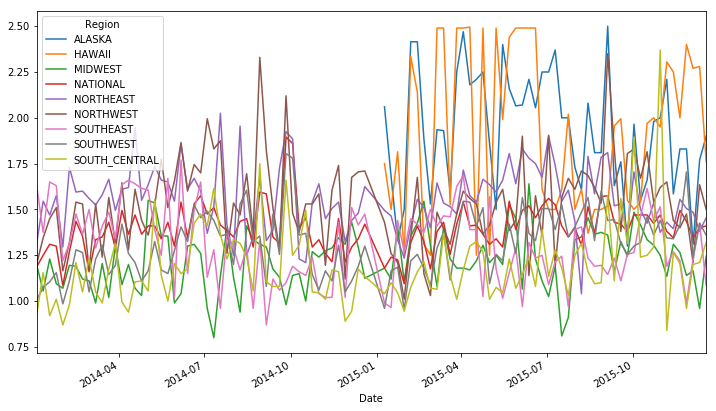

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

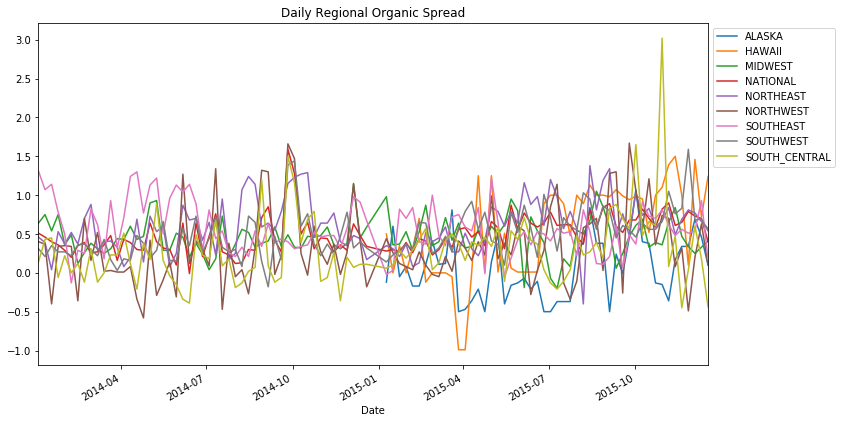

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


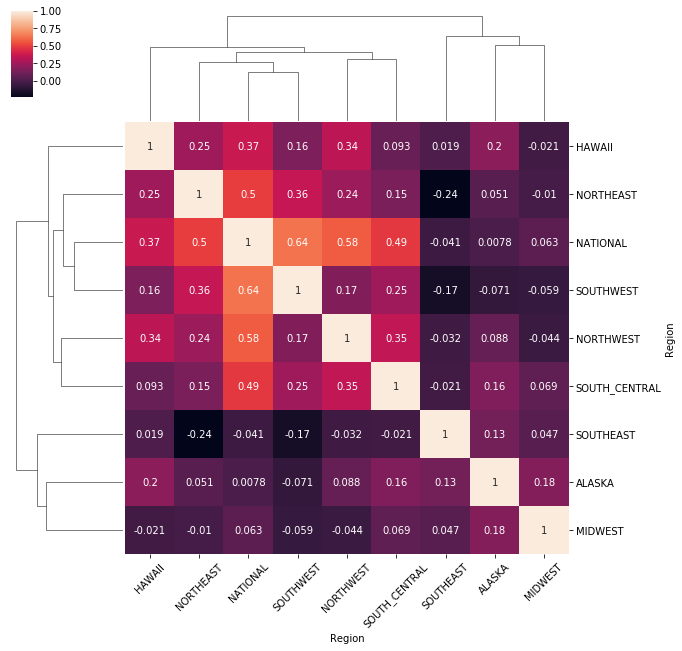

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34**

Datos tomados de:

https://www.datos.gov.co/Educaci-n/Aspirantes-Inscritos-Facultad-Programa-Genero-Estr/r86y-229a

In [127]:
import pandas as pd
import random
import requests
response = requests.get('https://www.datos.gov.co/resource/r86y-229a')
a_inscritos = pd.DataFrame(response.json())
a_inscritos

,periodo,facultad,programa,total_matricula,sexo_feme,sexo_masc,estrato_1,estrato_2,estrato_3,estrato_4,estrato_5,estrato_6
0,2015-1,Medicina Veterinaria y Zootecnia,Acuicultura,216,90,126,185,24,4,1,2,0
1,2015-1,"Ciencias Economicas, Jurídicas y Administrativas",Adminis. en Finanzas y Negocios Internacionales,1380,809,571,1189,172,16,3,0,0
2,2015-1,Ciencias de la Salud,Administración en Salud,1642,1052,590,1484,149,8,1,0,0
3,2015-1,Ciencias de la Salud,Bacteriología,770,574,196,686,76,7,1,0,0
4,2015-1,Ciencias Básicas,Biología,540,339,201,483,52,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
397,2021-1,Ciencias Agrícolas,Técnica Profesional en Manejo y Conservación d...,0,0,0,0,0,0,0,0,0
398,2021-1,Ciencias Agrícolas,Técnica Profesional en Mecanización Agrícola,0,0,0,0,0,0,0,0,0
399,2021-1,Ciencias Agrícolas,Técnica Profesional en Sistemas de Monitoreo A...,0,0,0,0,0,0,0,0,0
400,2021-1,Ciencias Agrícolas,Tecnología en Control y Gestión de Procesos Ag...,0,0,0,0,0,0,0,0,0


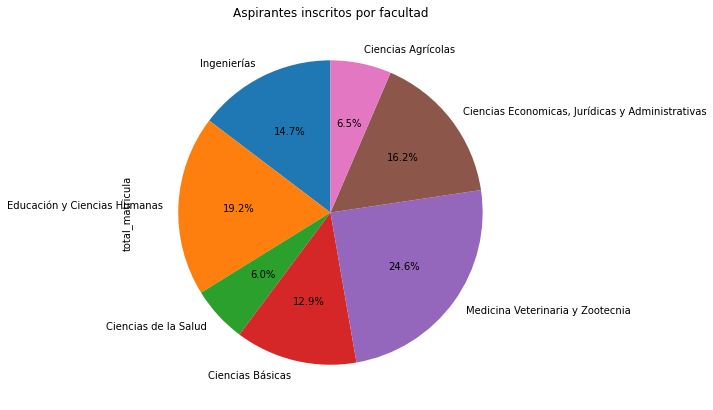

In [128]:
g = a_inscritos.loc[:, ['facultad']]
etiquetas = set(g.values.flatten());
a_inscritos.groupby(['facultad'])['total_matricula'].count().plot(kind='pie', y='values', labels=etiquetas, autopct='%1.1f%%', startangle=90);
plt.title('Aspirantes inscritos por facultad');

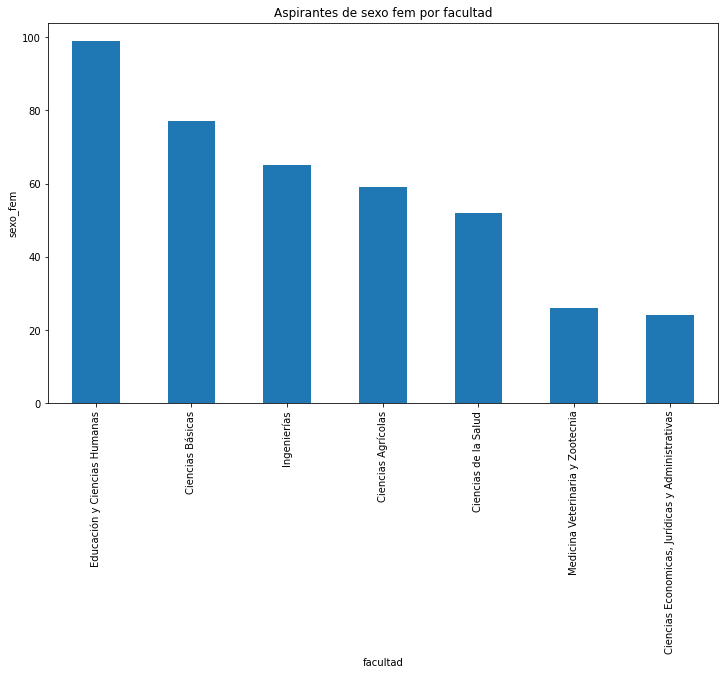

In [129]:
a_inscritos['facultad'].value_counts().plot(kind='bar');
plt.xlabel('facultad')
plt.ylabel('sexo_fem')
plt.title("Aspirantes de sexo fem por facultad");

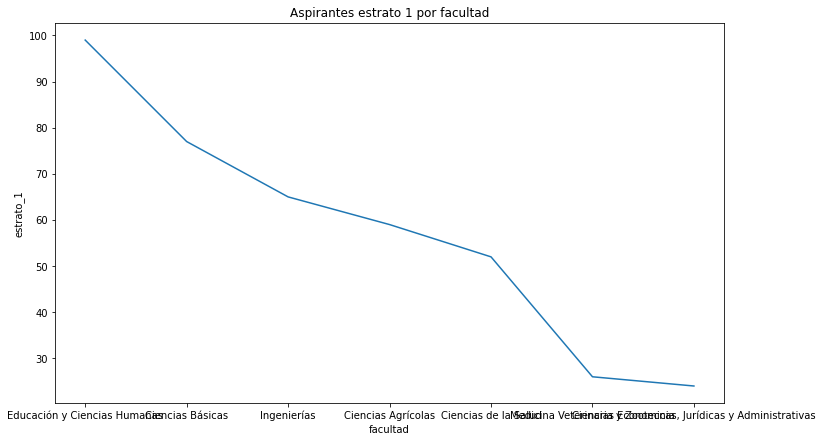

In [130]:
a_inscritos['facultad'].value_counts().plot(kind='line');
plt.xlabel('facultad')
plt.ylabel('estrato_1')
plt.title("Aspirantes estrato 1 por facultad");

In [131]:
a_inscritos.dtypes

periodo            object
facultad           object
programa           object
total_matricula    object
sexo_feme          object
sexo_masc          object
estrato_1          object
estrato_2          object
estrato_3          object
estrato_4          object
estrato_5          object
estrato_6          object
dtype: object

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!